# Regularization and Ridge Regression

First, lets create some data for fitting!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_data(n_samples=10, noise=0.1):
    x_true = np.linspace(0, 1, 100)
    y_true = np.sin(2*np.pi*x_true)

    x = np.linspace(0, 1, n_samples)
    y = np.sin(2*np.pi*x) + np.random.randn(*x.shape) * noise
    return (x_true, y_true), (x, y)

Define the neccesary functions for fitting linear regression models:

In [3]:
def f(x, w):
    return np.dot(x, w)

def train(X, y):
    #pinv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    pinv = np.linalg.pinv(X)
    return np.dot(pinv, y)

def expand_basis_polynomial(x, M=2):
    X = np.vstack((x, np.ones_like(x)))
    for i in range(2, M+1):
        X = np.vstack((X, x**(i)))
    return X.T

Create a function that allows us to evaluate both w.r.t. M as well as number of samples

In [4]:
def fit_plot_M(M = 1, N = 10):
    (x_true, y_true), (x, y) = create_data(N)
    X = expand_basis_polynomial(x, M)
    w = train(X, y)
    
    # Get the predictions
    y_pred = f(X, w)
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    X_des = expand_basis_polynomial(x_des, M) 
    y_des = f(X_des, w)


    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title("M = " + str(M) + ' N = ' + str(N))
    plt.show()
    
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    X_val = expand_basis_polynomial(x_val, M) 
    y_val_pred = f(X_val, w)

    print("M = ", M, " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))


Let's examine the behavior of a model for fixed capacity!

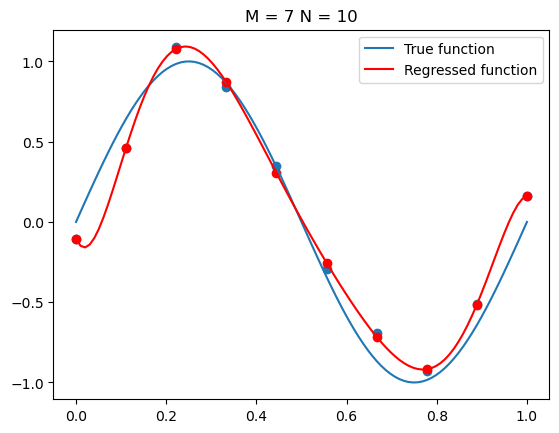

M =  7  train error =  0.004836011202601424  test error =  6.157483740116019


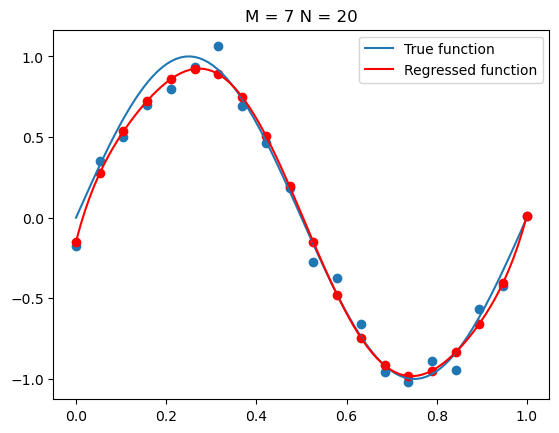

M =  7  train error =  0.10617314860702215  test error =  2.904251692686443


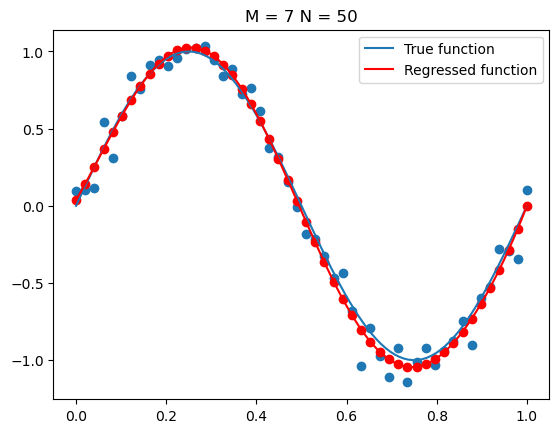

M =  7  train error =  0.4048313324870678  test error =  2.2251329526508368


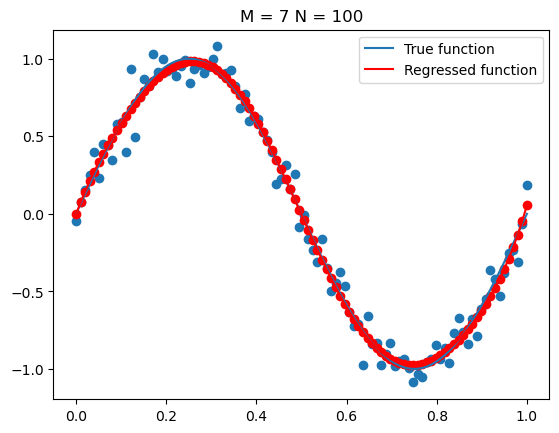

M =  7  train error =  0.7884741350002054  test error =  2.3623729911181064


In [5]:
for N in [10, 20, 50, 100]:
    fit_plot_M(M = 7, N = N)

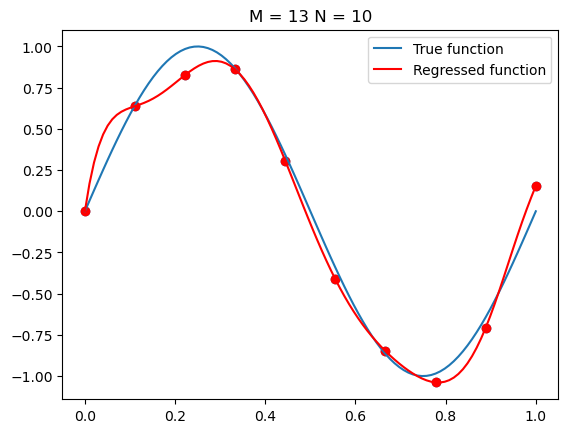

M =  13  train error =  5.242843373131341e-23  test error =  3.7092732059630884


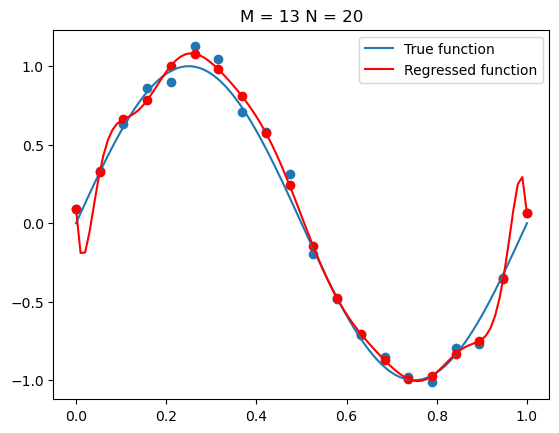

M =  13  train error =  0.046162282636191654  test error =  4.260443440058225


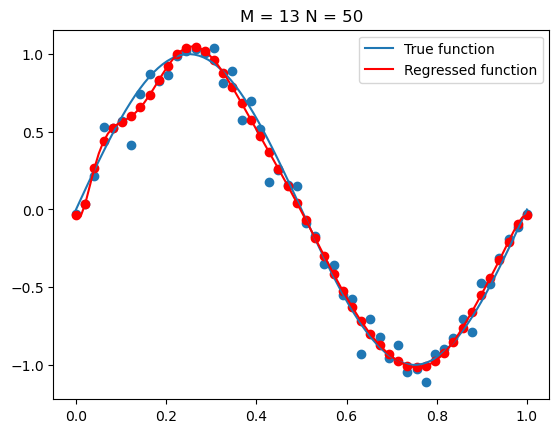

M =  13  train error =  0.29595302065495327  test error =  2.6712659258244003


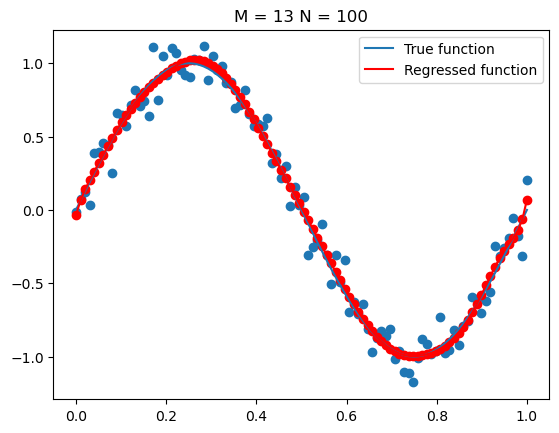

M =  13  train error =  1.0337586146325606  test error =  2.3095775694224034


In [6]:
for N in [10, 20, 50, 100]:
    fit_plot_M(M = 13, N = N)

Let's implement ridge regression! Note that we only need a small change in the training function.

In [7]:
def train_ridge(X, y, l):
    pinv = np.dot(np.linalg.inv(np.dot(X.T, X) + l * np.eye(X.shape[1])), X.T)
    return np.dot(pinv, y)


Create a function that allows us to evaluate ridge regression

In [8]:
def fit_plot_ridge(M = 1, N = 10, l=0):
    (x_true, y_true), (x, y) = create_data(N)
    X = expand_basis_polynomial(x, M)
    w = train_ridge(X, y, l)
    
    # Get the predictions
    y_pred = f(X, w)
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    X_des = expand_basis_polynomial(x_des, M) 
    y_des = f(X_des, w)


    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title("M = " + str(M) + ' N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    X_val = expand_basis_polynomial(x_val, M) 
    y_val_pred = f(X_val, w)

    print("M = ", M, " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))


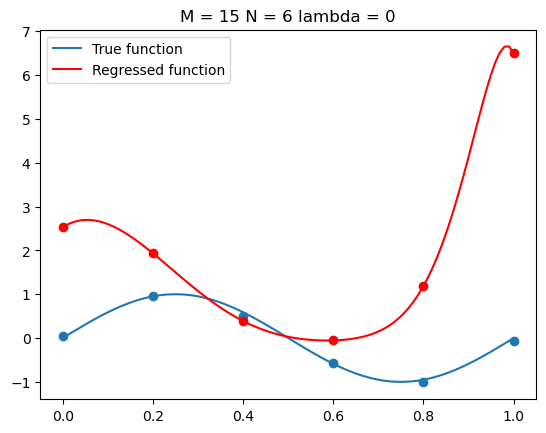

M =  15  train error =  55.232672188759544  test error =  1292.0386131950322


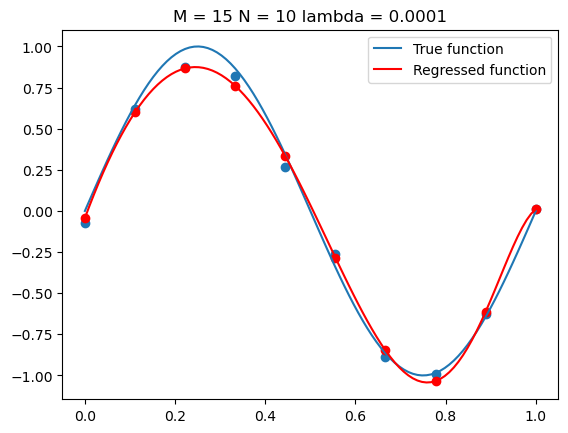

M =  15  train error =  0.01374194545220795  test error =  2.9601551348518313


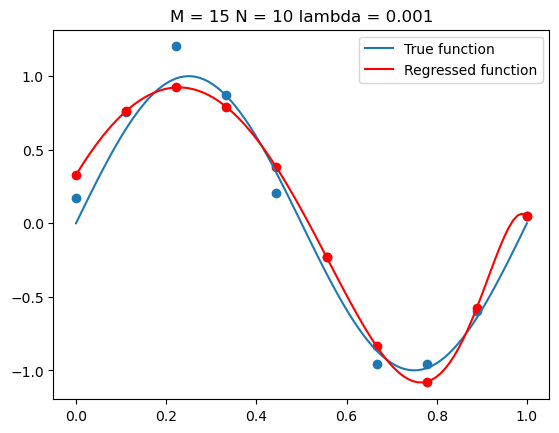

M =  15  train error =  0.16700651130411856  test error =  5.201012592984249


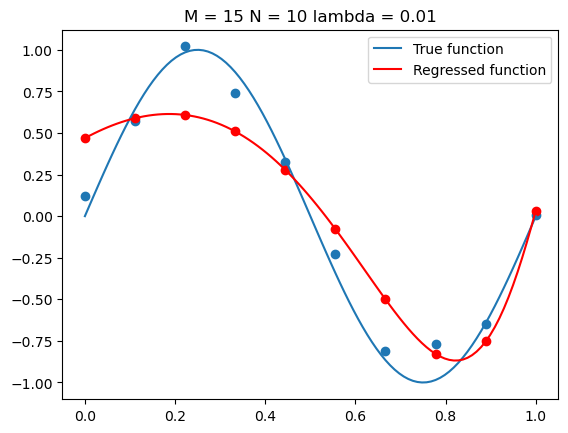

M =  15  train error =  0.4815455481377739  test error =  15.373833621396042


In [9]:
fit_plot_ridge(15, 6, 0)
fit_plot_ridge(15, 10, 0.0001)
fit_plot_ridge(15, 10, 0.001)
fit_plot_ridge(15, 10, 0.01)

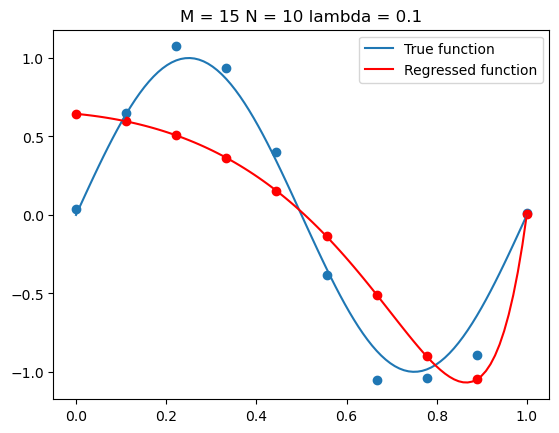

M =  15  train error =  1.4789880703208234  test error =  27.306516734444934


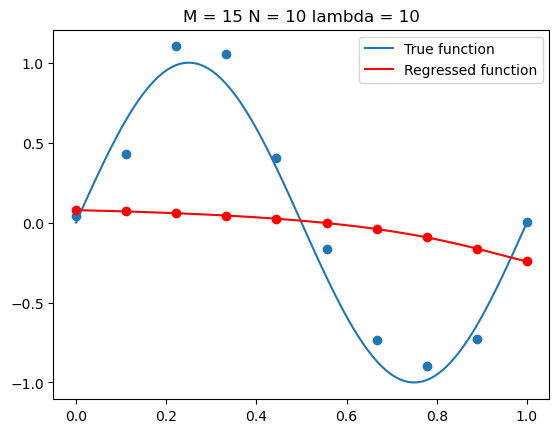

M =  15  train error =  3.909098303604641  test error =  91.72794944331254


In [10]:
fit_plot_ridge(15, 10, 0.1)
fit_plot_ridge(15, 10, 10)